## Import Necessary Libraries

In [12]:
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Data Feteching from Yahoo Finance

In [21]:
#pip install yfinance

In [23]:
# Get the data for amazon
ticker = "AMZN"  

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [24]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  155.897003  158.121994  155.777496  158.050003  158.050003   
2021-04-05  158.649994  161.798004  158.061996  161.336502  161.336502   
2021-04-06  161.187500  162.365494  160.852005  161.190994  161.190994   
2021-04-07  161.690002  165.180496  161.182495  163.969498  163.969498   
2021-04-08  165.544998  166.225006  164.600006  164.964996  164.964996   

              Volume  
Date                  
2021-04-01  58806000  
2021-04-05  66698000  
2021-04-06  50756000  
2021-04-07  66924000  
2021-04-08  56242000

## 2. Select the Target Variable and Clean the data

In [25]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


### 2.1 Plot the time series

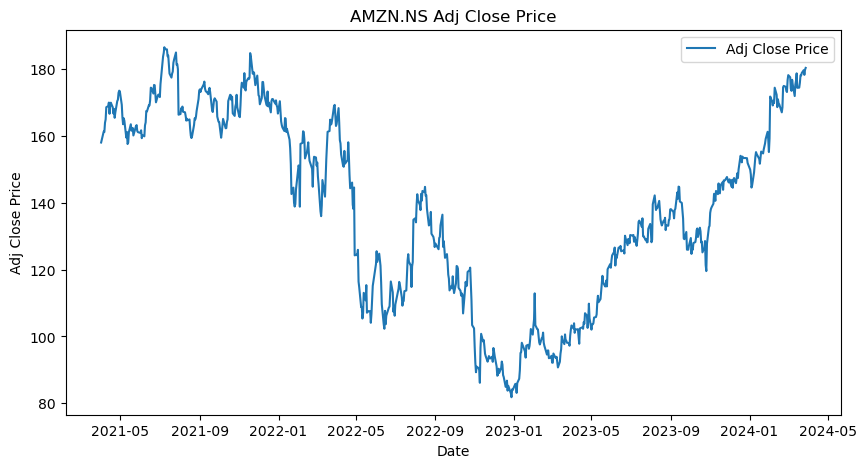

In [26]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('AMZN.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### 2.2 Decomposition of Time series

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [28]:
df.columns

Index(['Adj Close'], dtype='object')

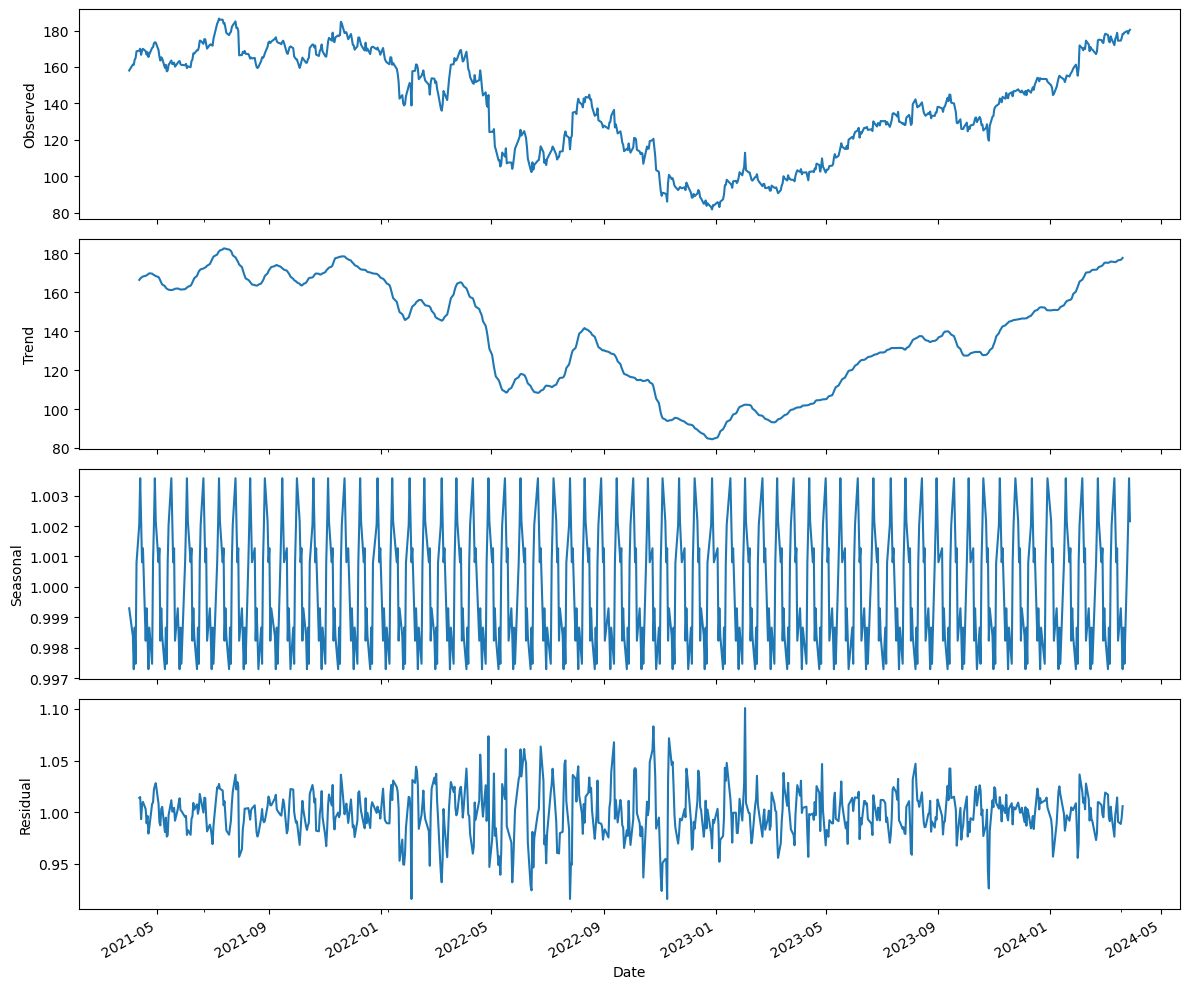

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [30]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## 3. Univariate Forecasting - Conventional Models/Statistical Models

### 3.1 HW Model

In [31]:
monthly_data = df.resample("M").mean()

In [32]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [33]:
len(monthly_data), len(train_data)

(36, 28)

In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

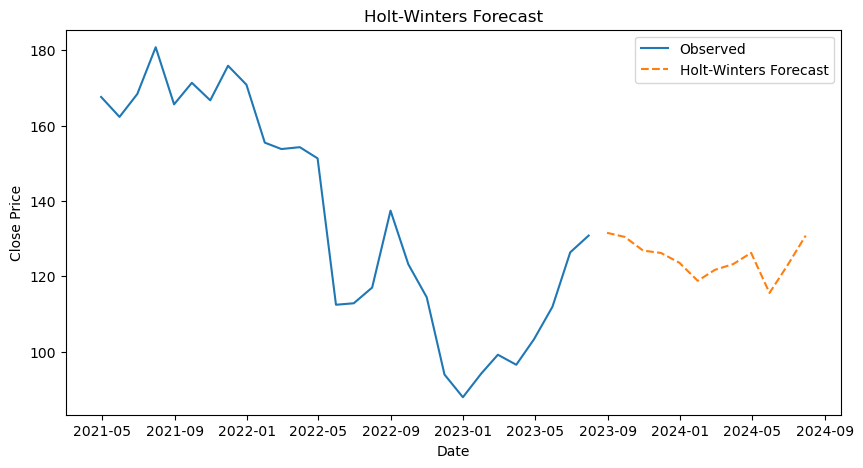

In [35]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [36]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [37]:
len(test_data), len(y_pred)

(8, 8)

In [38]:
y_pred, test_data

(2023-08-31    131.557510
 2023-09-30    130.461985
 2023-10-31    126.831571
 2023-11-30    126.217010
 2023-12-31    123.625061
 2024-01-31    118.829150
 2024-02-29    121.739292
 2024-03-31    123.272835
 Freq: M, dtype: float64,
              Adj Close
 Date                  
 2023-08-31  135.502175
 2023-09-30  135.440001
 2023-10-31  128.278636
 2023-11-30  143.457621
 2023-12-31  149.824000
 2024-01-31  153.615237
 2024-02-29  171.003498
 2024-03-31  176.822500)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 30.681139326587626
MAE: 23.92615656477956
MAPE: nan
R-squared: -2.575963502033658


In [40]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [41]:
holt_winters_forecast

2023-08-31    131.557510
2023-09-30    130.461985
2023-10-31    126.831571
2023-11-30    126.217010
2023-12-31    123.625061
2024-01-31    118.829150
2024-02-29    121.739292
2024-03-31    123.272835
2024-04-30    126.253028
2024-05-31    115.605877
2024-06-30    122.847311
2024-07-31    130.818000
2024-08-31    131.557510
2024-09-30    130.461985
2024-10-31    126.831571
2024-11-30    126.217010
2024-12-31    123.625061
2025-01-31    118.829150
2025-02-28    121.739292
2025-03-31    123.272835
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [43]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [45]:
!pip install pmdarima
from pmdarima import auto_arima

   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   - -------------------------------------- 20.5/614.7 kB ? eta -:--:--
   -- ------------------------------------ 41.0/614.7 kB 393.8 kB/s eta 0:00:02
   --- ----------------------------------- 61.4/614.7 kB 409.6 kB/s eta 0:00:02
   ------ ------------------------------- 112.6/614.7 kB 656.4 kB/s eta 0:00:01
   ------------ ------------------------- 204.8/614.7 kB 892.5 kB/s eta 0:00:01
   ------------------- -------------------- 307.2/614.7 kB 1.1 MB/s eta 0:00:01
   ----------------------- ---------------- 358.4/614.7 kB 1.2 MB/s eta 0:00:01
   ----------------------------- ---------- 450.6/614.7 kB 1.2 MB/s eta 0:00:01
   --------------------------------- ------ 522.2/614.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  614.4/614.7 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? 

In [46]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   28
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -105.647
Date:                Mon, 22 Jul 2024   AIC                            213.293
Time:                        21:32:13   BIC                            214.589
Sample:                    04-30-2021   HQIC                           213.679
                         - 07-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       146.6146     28.405      5.161      0.000      90.941     202.288
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 7.08
Prob(Q):                              0.74   Pr

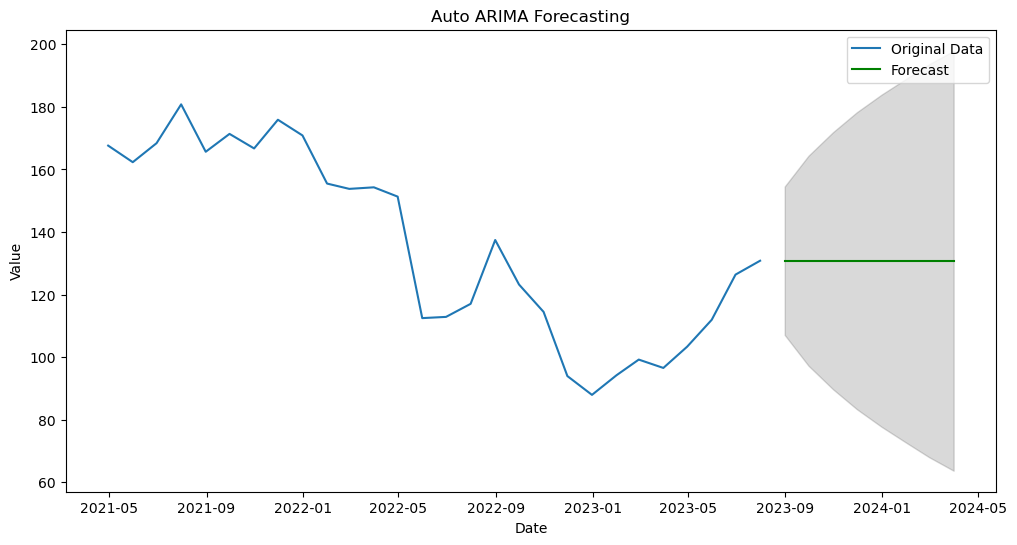

In [48]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [49]:
len(forecast)

8

In [50]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 24.550313044409577
MAE: 19.059799180837672
MAPE: nan
R-squared: -1.2896240609736385


### 3.3 ARIMA Daily Data

In [51]:
daily_data= df.copy()

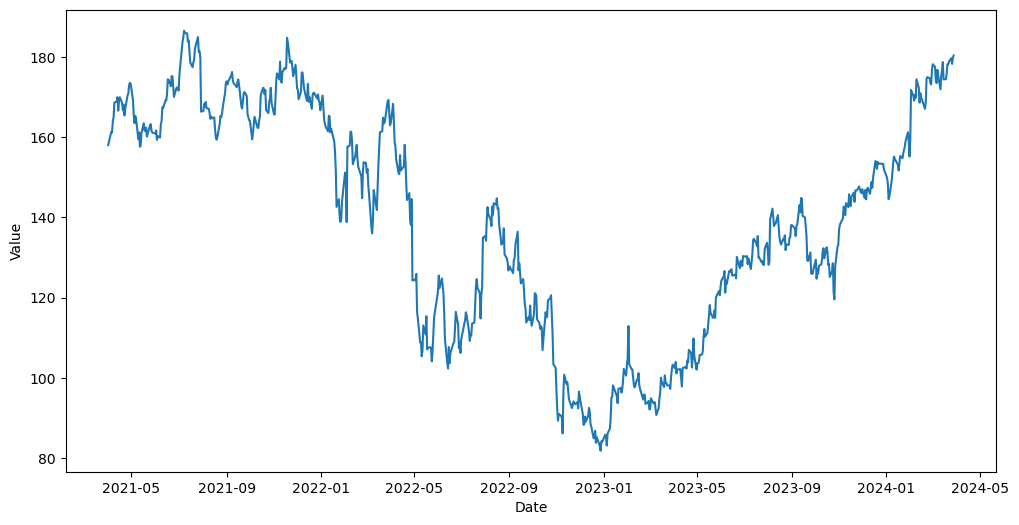

In [52]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [53]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [54]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  753
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1913.872
Date:                Mon, 22 Jul 2024   AIC                           3829.745
Time:                        21:33:23   BIC                           3834.368
Sample:                             0   HQIC                          3831.526
                                - 753                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.5087      0.255     37.346      0.000       9.010      10.008
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               924.81
Prob(Q):                              0.98   Pr

In [55]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [56]:
fitted_values

Date
2021-04-01      0.000000
2021-04-05    158.050003
2021-04-06    161.336502
2021-04-07    161.190994
2021-04-08    163.969498
                 ...    
2024-03-22    178.149994
2024-03-25    178.869995
2024-03-26    179.710007
2024-03-27    178.300003
2024-03-28    179.830002
Name: predicted_mean, Length: 753, dtype: float64

In [57]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\sayas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\sayas\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [58]:
len(forecast)

60

In [62]:
import matplotlib.pyplot as plt

In [63]:
len('future_dates')

12

In [64]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

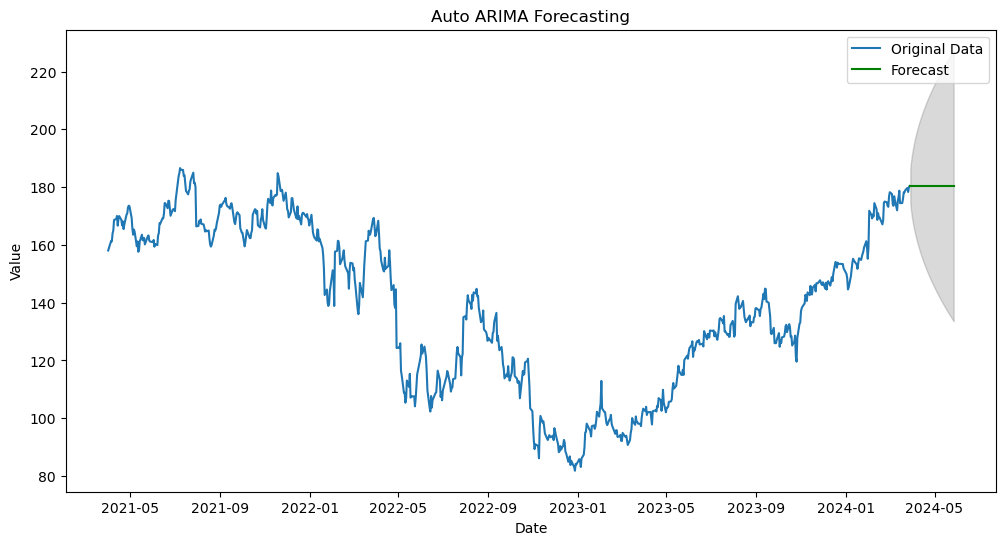

In [65]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

### 2. Multivariate Forecasting - Machine Learning Models

In [95]:
!pip install tensorflow

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [97]:
data.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2021-04-01  155.897003  158.121994  155.777496  158.050003  158.050003   
2021-04-05  158.649994  161.798004  158.061996  161.336502  161.336502   
2021-04-06  161.187500  162.365494  160.852005  161.190994  161.190994   
2021-04-07  161.690002  165.180496  161.182495  163.969498  163.969498   
2021-04-08  165.544998  166.225006  164.600006  164.964996  164.964996   

              Volume  
Date                  
2021-04-01  58806000  
2021-04-05  66698000  
2021-04-06  50756000  
2021-04-07  66924000  
2021-04-08  56242000

In [98]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [99]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (723, 30, 6)
Shape of y: (723,)


In [100]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\sayas\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [102]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - loss: 0.2515 - val_loss: 0.0158
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0240 - val_loss: 0.0043
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0115 - val_loss: 0.0081
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0159 - val_loss: 0.0032
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0107 - val_loss: 0.0027
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0099 - val_loss: 0.0072
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0124 - val_loss: 0.0051
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0122 - val_loss: 0.0055
Epoch 9/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0111 - val_loss: 0.0062
Epoch 10/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0099 - val_loss: 0.0065
Epoch 11/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0127 - val_loss: 0.0073
Epoch 12/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.

In [106]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [107]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 131.3702267701949, True Value: 138.00999450683594
Prediction: 131.53269814831788, True Value: 138.1199951171875
Prediction: 131.9685649881751, True Value: 137.27000427246094
Prediction: 132.3813647883553, True Value: 135.36000061035156
Prediction: 132.59917957957805, True Value: 137.85000610351562
Prediction: 132.7079090321306, True Value: 138.22999572753906
Prediction: 132.97988719301043, True Value: 143.10000610351562
Prediction: 133.5273461834015, True Value: 141.22999572753906
Prediction: 134.23451999540794, True Value: 144.85000610351562
Prediction: 135.00380217855718, True Value: 144.72000122070312


In [108]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 8.482147945170224
MAE: 7.524466659804938
MAPE: 5.166389938832566
R-squared: 0.7473238623479965


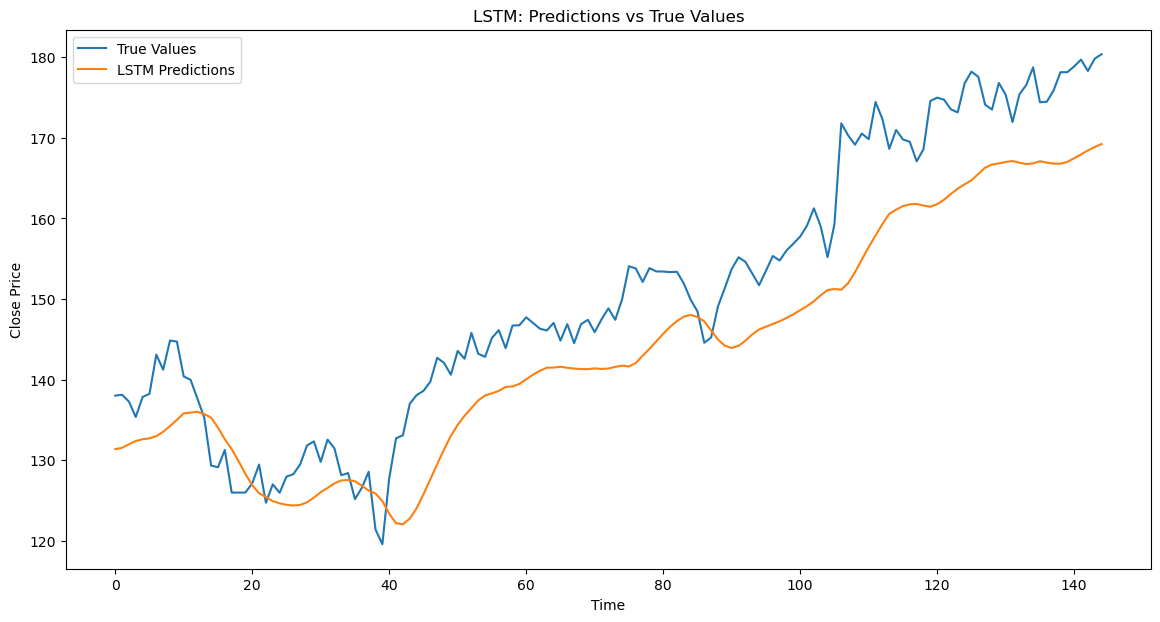

In [109]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Tree Based Models

In [110]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [111]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [112]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [113]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.0021264485033282436


In [114]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.046113430834500306
MAE: 0.03516543594711524
MAPE: 43482.48419281644
R-squared: 0.9691080638978359


In [115]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.0011195021791410278


In [116]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.03345896261304328
MAE: 0.02483511765133715
MAPE: 43841.40758463388
R-squared: 0.9837364555360127


In [117]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.42281423615701175, True Value: 0.4461077052732596
Prediction: 0.45212189755508736, True Value: 0.41508159917470366
Prediction: 0.42157321813329895, True Value: 0.43245621567653614
Prediction: 0.8609791784430092, True Value: 0.8575472417520444
Prediction: 0.17069128979274872, True Value: 0.15073915190813714
Prediction: 0.2968005420595423, True Value: 0.20591787663921046
Prediction: 0.7935952282678544, True Value: 0.7663735317855096
Prediction: 0.8310318891158153, True Value: 0.862883786772142
Prediction: 0.2248390496710928, True Value: 0.3202705607203338
Prediction: 0.21126389007547564, True Value: 0.20992738671640943


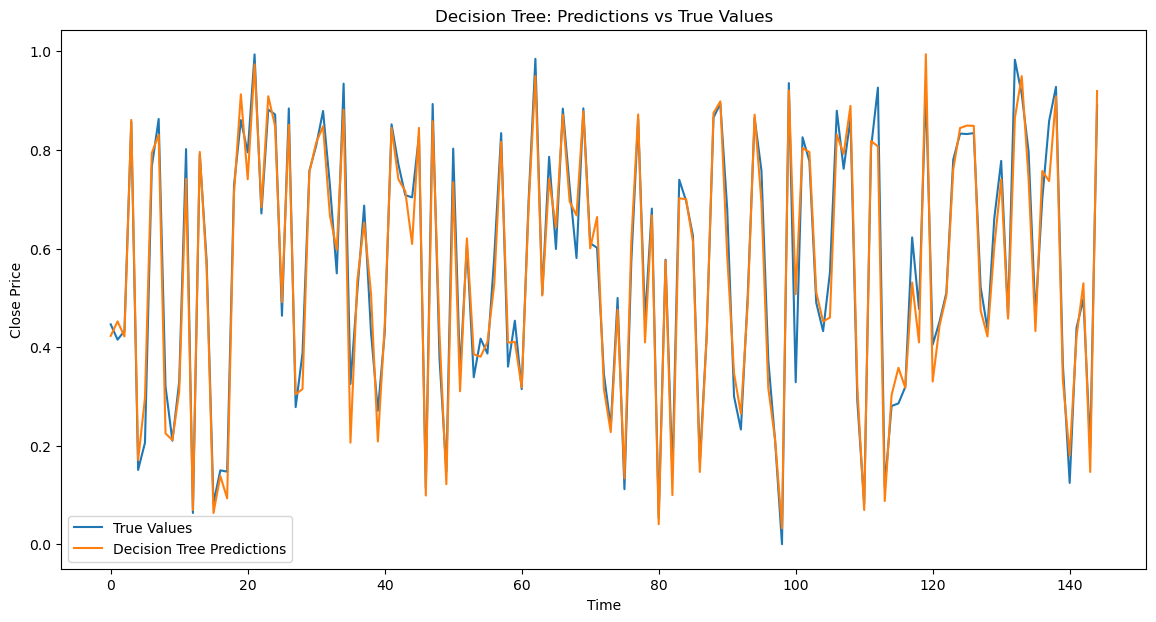

In [118]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [119]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.44864036384355627, True Value: 0.4461077052732596
Prediction: 0.4226786688310012, True Value: 0.41508159917470366
Prediction: 0.42936408441835927, True Value: 0.43245621567653614
Prediction: 0.8688236767506031, True Value: 0.8575472417520444
Prediction: 0.1712879784545462, True Value: 0.15073915190813714
Prediction: 0.27049772841771047, True Value: 0.20591787663921046
Prediction: 0.7906009290555612, True Value: 0.7663735317855096
Prediction: 0.8509874968107829, True Value: 0.862883786772142
Prediction: 0.25904188368458597, True Value: 0.3202705607203338
Prediction: 0.21961949567282477, True Value: 0.20992738671640943


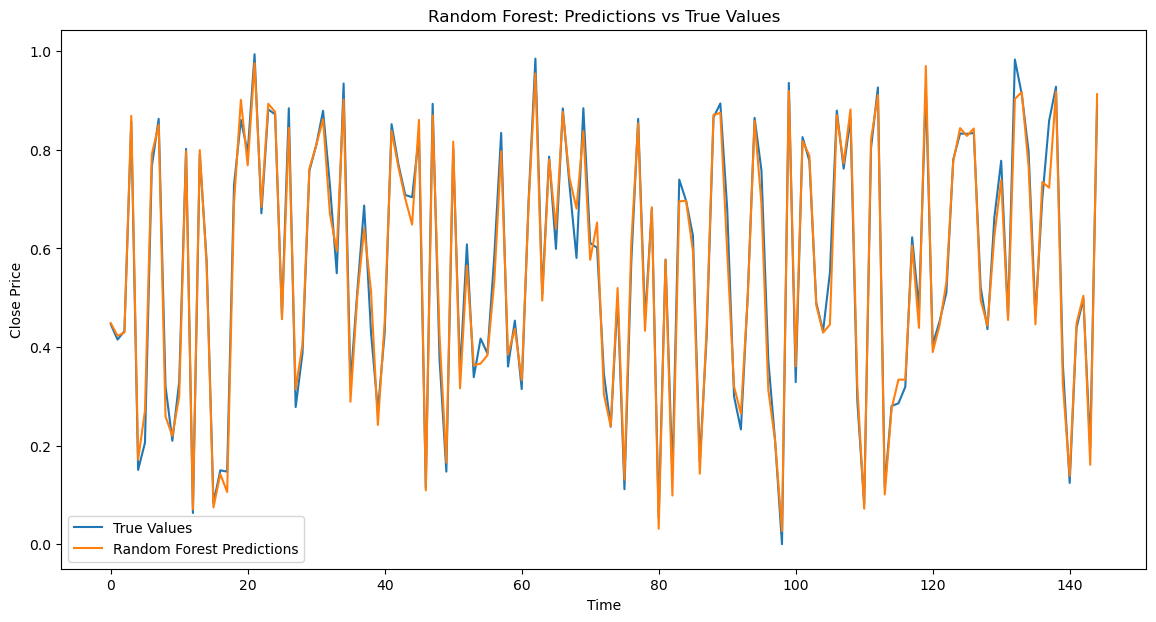

In [120]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

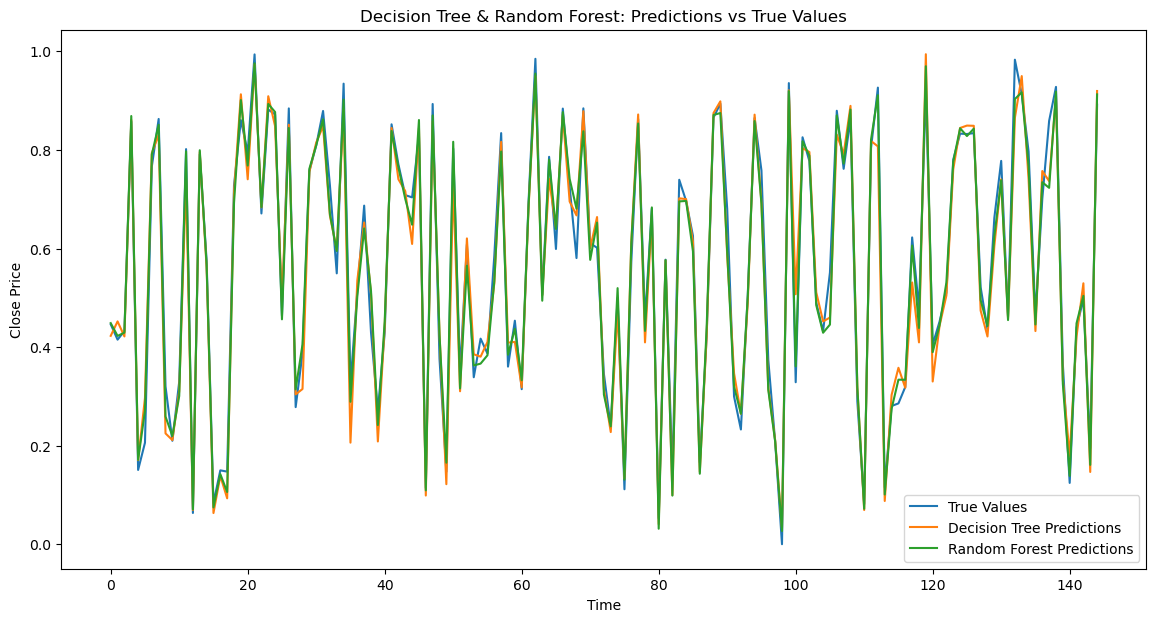

In [121]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()